In [1]:
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from ptcr2.FOM import FOM

config_file = 'samples/wedding_fom.json'
# parse file name
file_name = config_file.split('/')[-1].split('.')[0]

with open(config_file) as f:
    spec = json.loads(f.read())


In [2]:
wedding_fom = FOM()
start = timer()
wedding_fom.compute_optimal_policy(spec)
end = timer()

print('Time elapsed to compute optimal policy: ', end - start)

Formatting checks succeeded.

            Transition Matrix            
┏━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃   ┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ I │ 0.0 │ 0.1 │ 0.3 │ 0.1 │ 0.2 │ 0.3 │
│ E │ 0.0 │ 0.1 │ 0.2 │ 0.1 │ 0.3 │ 0.3 │
│ B │ 0.0 │ 0.2 │ 0.1 │ 0.1 │ 0.3 │ 0.3 │
│ C │ 0.0 │ 0.1 │ 0.2 │ 0.2 │ 0.3 │ 0.2 │
│ D │ 0.0 │ 0.2 │ 0.3 │ 0.1 │ 0.1 │ 0.3 │
│ S │ 0.0 │ 0.4 │ 0.2 │ 0.2 │ 0.2 │ 0.0 │
└───┴─────┴─────┴─────┴─────┴─────┴─────┘

        Initial Distribution         
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ 0.0 │ 0.1 │ 0.3 │ 0.2 │ 0.2 │ 0.2 │
└─────┴─────┴─────┴─────┴─────┴─────┘

         Cost Matrix         
┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃ I ┃ E ┃ B ┃ C ┃ D ┃ S ┃
┡━━━╇━━━╇━━━╇━━━╇━━━╇━━━╇━━━┩
│ I │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
│ E │ 1 │ 0 │ 1 │ 2 │ 3 │ 4 │
│ B │ 2 │ 1 │ 0 │ 1 │ 2 │ 3 │
│ C │ 3 │ 2 │ 1 │ 0 │ 1 │ 2 │
│ D │ 4 │ 3 │ 2 │ 1 │ 0 │ 1 │
│ S │ 5 │ 4 │ 3 │ 2 │ 1 │ 0 │
└───┴───┴───┴───┴───┴───┴───┘

Alphabet 
┏━━━━━━━┓
┃ Items ┃
┡━━━━━━━┩
│ d12   │
│ s2    │
│ s3    │
│ s1    │
│ e2    │
│ d3    │
│ d23   │
│ d2    │
│ c1    │
│ d1    │
│ b1    │
│ e3    │
│ c2    │
│ b3    │
│ e1    │
│ c3    │
│ b2    │
└───────┘

Single initial state 0:
[[('d1', 'd2'), 'd12']]

Single initial state 1:
[[('d2', 'd3'), 'd23']]

Unreachable state have been recognized
Start checking transitions to remove
Number of transitions: 2587213
End checking transitions to remove
Start removing unreachable transitions
End removing unreachable transitions
Start removing unreachable states
End removing unreachable states
Start reindexing states
End reindexing states
Number of unreachable states removed = 0
Number of unreachable transitions removed = 0
Time elapsed to compute optimal policy:  84.0624227


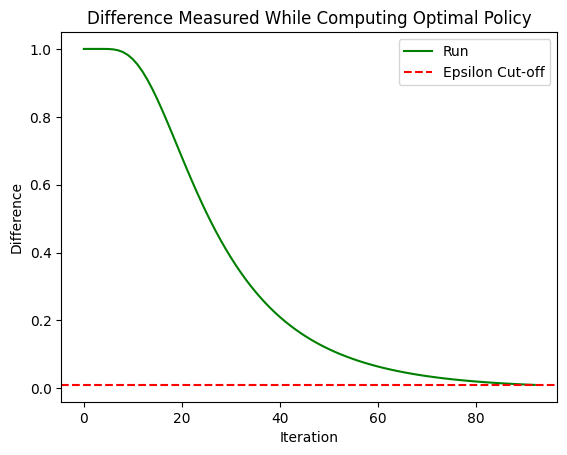

In [7]:
plt.title('Difference Measured While Computing Optimal Policy')
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.plot(wedding_fom.computed_policy['diff_tracker'], 'g', label='Run')
plt.axhline(wedding_fom.epsilon, linestyle='--', color='r', label='Epsilon Cut-off')
plt.legend()

In [ ]:
results = wedding_fom.simulate_general_and_greedy_algorithms()  # Spec not needed since we're computing optimal policy separately

print(results)